In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure

dataset = "FashionMnist"


# Read Ens ECE values

In [2]:
with open(f"{dataset}/res_array_all.npy", 'rb') as f:
    res_array_all = np.load(f, allow_pickle=True) 
    # print(res_array_all)
    # print("------------------------------------")

normal_cw_ece = np.array(res_array_all[:,-8])
a_normal_cw_ece = []
for i in normal_cw_ece:
    a_normal_cw_ece.append(i)
normal_cw_ece = np.array(a_normal_cw_ece)

sk_iso_cw_ece = np.array(res_array_all[:,-7])
a_sk_iso_cw_ece = []
for i in sk_iso_cw_ece:
    a_sk_iso_cw_ece.append(i)
sk_iso_cw_ece = np.array(a_sk_iso_cw_ece)

dir_cw_ece    = np.array(res_array_all[:,-6])
a_dir_cw_ece = []
for i in dir_cw_ece:
    a_dir_cw_ece.append(i)
dir_cw_ece = np.array(a_dir_cw_ece)


normal_conf_ece = np.array(res_array_all[:,-5])
a_normal_conf_ece = []
for i in normal_conf_ece:
    a_normal_conf_ece.append(i)
normal_conf_ece = np.array(a_normal_conf_ece)

sk_iso_conf_ece = np.array(res_array_all[:,-4])
a_sk_iso_conf_ece = []
for i in sk_iso_conf_ece:
    a_sk_iso_conf_ece.append(i)
sk_iso_conf_ece = np.array(a_sk_iso_conf_ece)

dir_conf_ece    = np.array(res_array_all[:,-3])
a_dir_conf_ece = []
for i in dir_conf_ece:
    a_dir_conf_ece.append(i)
dir_conf_ece = np.array(a_dir_conf_ece)

ctp_cs_ece = np.array(res_array_all[:,-2])
a_ctp_cs_ece = []
for i in ctp_cs_ece:
    a_ctp_cs_ece.append(i)
ctp_cs_ece = np.array(a_ctp_cs_ece)

dir_ctp_conf_ece    = np.array(res_array_all[:,-1])
a_dir_ctp_conf_ece = []
for i in dir_ctp_conf_ece:
    a_dir_ctp_conf_ece.append(i)
dir_ctp_conf_ece = np.array(a_dir_ctp_conf_ece)



print("--- ens")
# each row is a run of the ensemble
# colomn is ens ECE values for a class

print("------------------------------------ conf ECE")
print("Ens normal_conf_ece ", normal_conf_ece.mean(axis=0).sum())
print("Ens sk_iso_conf_ece ", sk_iso_conf_ece.mean(axis=0).sum())
print("Ens dir_conf_ece ", dir_conf_ece.mean(axis=0).sum())
print("------------------------------------ classwise ECE")
print("Ens normal_cw_ece ", normal_cw_ece.mean(axis=0).sum())
print("Ens sk_iso_cw_ece ", sk_iso_cw_ece.mean(axis=0).sum())
print("Ens dir_cw_ece ", dir_cw_ece.mean(axis=0).sum())


print("------------------------------------ calib then pool")
print("Ens dir_ctp_conf_ece ", dir_ctp_conf_ece.mean(axis=0).sum())
print("Ens dir_ctp_cs_ece ", ctp_cs_ece.mean(axis=0).sum())



--- ens
------------------------------------ conf ECE
Ens normal_conf_ece  0.0862805182911778
Ens sk_iso_conf_ece  0.009372344405690885
Ens dir_conf_ece  0.006786921810412778
------------------------------------ classwise ECE
Ens normal_cw_ece  0.1755233397734138
Ens sk_iso_cw_ece  0.03410048604973649
Ens dir_cw_ece  0.028807284248081447
------------------------------------ calib then pool
Ens dir_ctp_conf_ece  0.18665463285710993
Ens dir_ctp_cs_ece  0.38521370312005176


# prepare Ens data for plot

In [3]:
ens_cw_df = pd.DataFrame(columns=['run','Class','ECE_normal','ECE_iso', 'ECE_dir', 'PTC_CW_dir']) # 
# ens_full_df = pd.DataFrame(columns=['run','Sum','full_ECE_normal','full_ECE_iso', 'full_ECE_dir']) # 


for run_index, (run_norm, run_sk_iso, run_dir, run_ctp) in enumerate(zip(normal_cw_ece, sk_iso_cw_ece, dir_cw_ece, ctp_cs_ece)):
    cw_data = ({
    'run': np.full(len(run_norm), run_index),
    'Class': range(10),
    'ECE_normal': run_norm,
    'ECE_iso': run_sk_iso,
    'ECE_dir': run_dir,
    'PTC_CW_dir': run_ctp
    })

    df = pd.DataFrame(cw_data)
    ens_cw_df = pd.concat([ens_cw_df, df])

    # full_data = {
    # 'run': run_index,
    # 'Sum': 0,
    # 'full_ECE_normal': run_norm.sum(),
    # 'full_ECE_iso': run_sk_iso.sum(),
    # 'full_ECE_dir': run_dir.sum()
    # }

    # ens_full_df = ens_full_df.append(full_data, ignore_index=True)
    # # ens_full_df = ens_full_df.append(ens_full_df)
    # # full_df = pd.DataFrame(full_data)
    # # ens_full_df = pd.concat([ens_full_df, full_df])

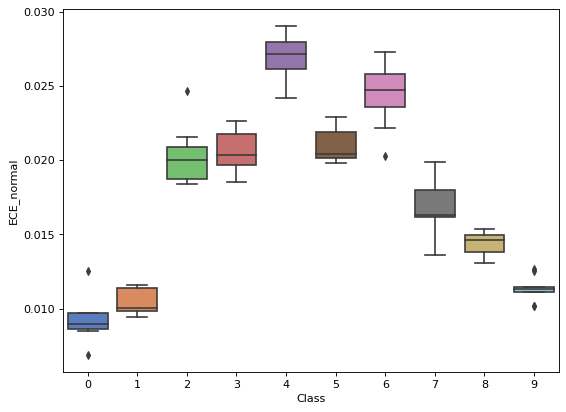

In [4]:
figure(figsize=(8, 6), dpi=80)
# sns.set_style("dark")
# sns.axes_style("white")
ax = sns.boxplot(x="Class", y="ECE_normal", data=ens_cw_df, palette="muted")

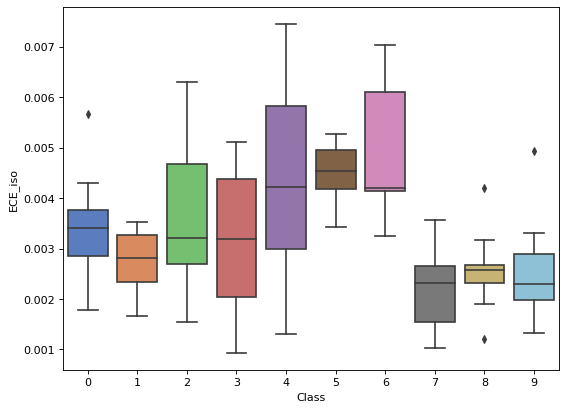

In [5]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(x="Class", y="ECE_iso", data=ens_cw_df, palette="muted")

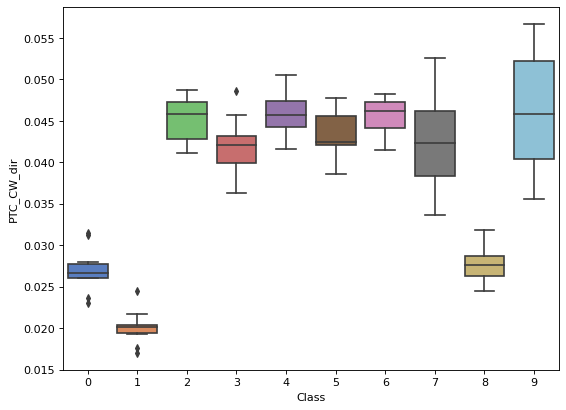

In [6]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(x="Class", y="PTC_CW_dir", data=ens_cw_df, palette="muted")

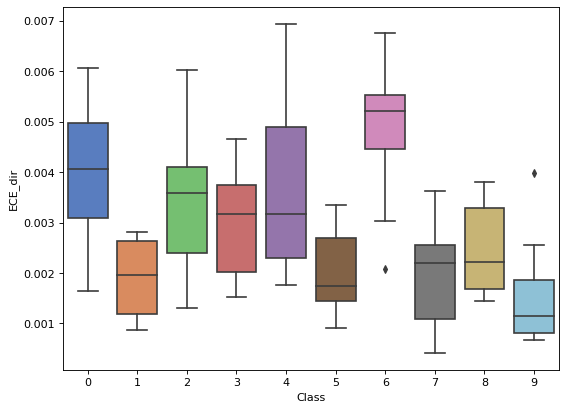

In [7]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(x="Class", y="ECE_dir", data=ens_cw_df, palette="muted")

# Read member ECE values

In [8]:
print("------------------------------------ members ")
# each row is a member of the ensemble
# colomn is member ECE values for a class

member_df = pd.DataFrame(columns=['run','member','Class','ECE_normal','ECE_iso']) # ECE_dir

for run_index in range(10):
    with open(f"{dataset}/mem_run{run_index}_normal_cw_ece.npy", 'rb') as f:
        raw_normal = np.load(f, allow_pickle=True) 
    with open(f"{dataset}/mem_run{run_index}_sk_iso_cw_ece.npy", 'rb') as f:
        raw_sk_iso = np.load(f, allow_pickle=True) 
    with open(f"{dataset}/mem_run{run_index}_dir_cw_ece.npy", 'rb') as f:
        raw_dir = np.load(f, allow_pickle=True) 
    
    # convert all member data into DataFrame with coloms 'run','member','Class','ECE'
    for mem_index, (member_norm, member_sk_iso) in enumerate(zip(raw_normal, raw_sk_iso)):
        # print(member_norm)
        # print(mem_index)
        # print("------------------------------------")
        member_data = ({
        'run': np.full(len(member_norm), run_index),
        'member' :np.full(len(member_norm), mem_index),
        'Class': range(10),
        'ECE_normal': member_norm,
        'ECE_iso': member_sk_iso,
        # 'ECE_dir': member_dir
        })

        df = pd.DataFrame(member_data)
        member_df = pd.concat([member_df, df])

------------------------------------ members 


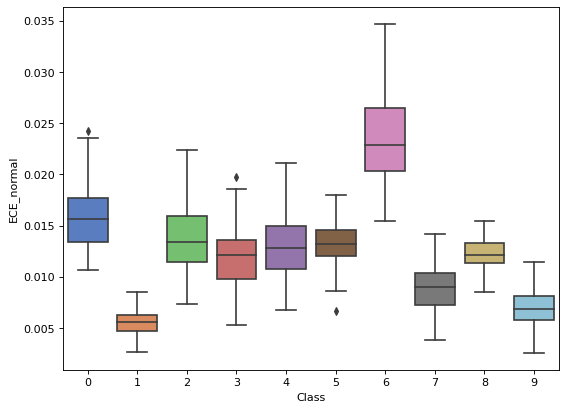

In [9]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(x="Class", y="ECE_normal", data=member_df, palette="muted")

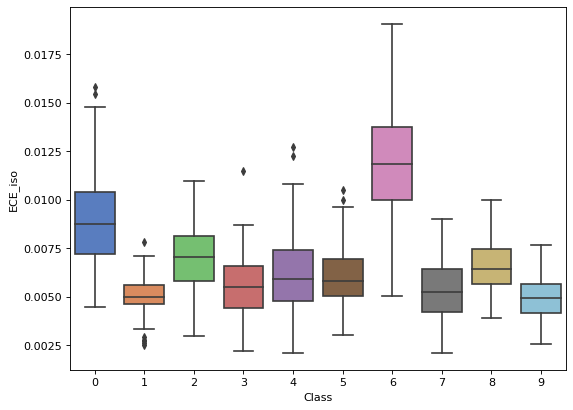

In [10]:
figure(figsize=(8, 6), dpi=80)
ax = sns.boxplot(x="Class", y="ECE_iso", data=member_df, palette="muted")